In [ ]:
#Criar um modelo de inteligencia artificial para tentar prever as vendas de acordo com o tipo de meio de divulgacao utilizado

In [ ]:
#instalando bibliotecas:
#graficos
#!pip install matplotlib 
#graficos
#!pip install seaborn 
#intelegencia artificial
#!pip install scikit-learn 

In [1]:
#importando bibliotecas:
import pandas as pd

df= pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


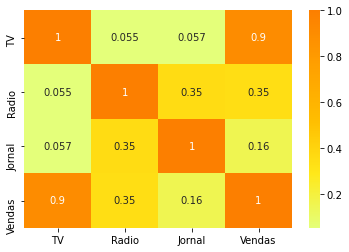

In [2]:
# Analise exploratoria:
# visualizar os dado para ver como as informacoes estao distribuidas
# e ver a correlacao entre as variasveis

import seaborn as sns
import matplotlib.pyplot as plt

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#cmap: escala de cores
#annot: numero da correlacao aparente dentro do grafico
sns.heatmap(df.corr(),annot=True,cmap="Wistia")
plt.show()

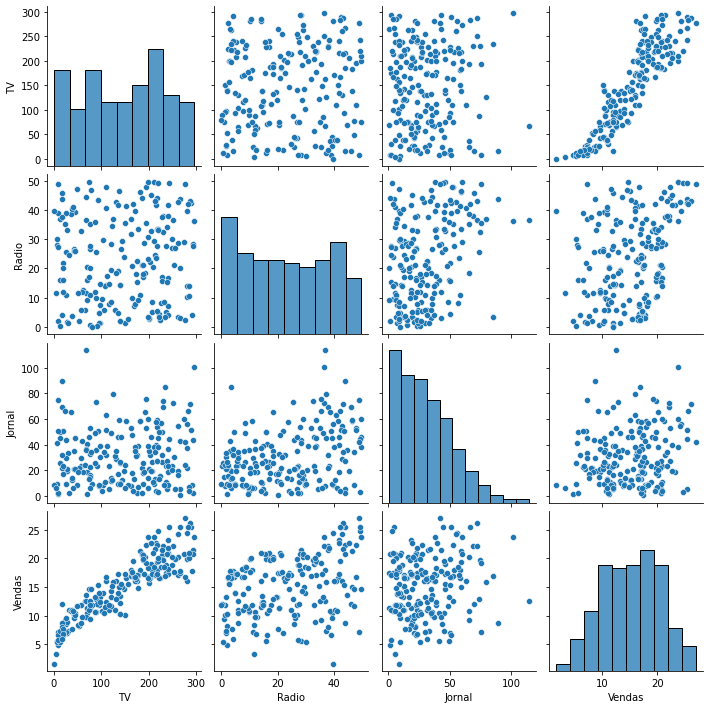

In [3]:
#outra forma de fazer a mesma analise:
sns.pairplot(df)
plt.show()

In [4]:
#Ajustando dados para para treinamento do modelo de Machine Learning:

#y -> quem você quer prever
#x -> o resto (quem você vai usar para fazer a previsao)

#y = "vendas" pq sao elas que eu quero prever
#x = "tv, radio, jornal" pq são eles que irei usar para fazer a previsao de vendas

# e ainda dividir a base de dados em parte de treino e parte de teste(de 20 a 30% = 0.2 a 0.3)

from sklearn.model_selection import train_test_split

#y = tabela['Vendas']  #selecionar uma coluna = 1 colchete
#x = tabela[['TV', 'Radio', 'Jornal']] #selecionar mais de uma coluna = 2 colchetes
#ou:

y = df['Vendas']
x = df.drop('Vendas', axis= 1) #coluna vendas

#colocar nessa ordem x:treino/teste, y:treino/teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) #random_state não precisa pq ele esta fixando a formar aleatoria

In [5]:
#se eu quiser visualizar:
#display(x_train)
#display(x_test)
#display(y_train)
#display(y_test)

In [6]:
#Testar dois modelos para ver qual tem melhor resultado:

# ---> Regressao Linear
from sklearn.linear_model import LinearRegression

# cria os modelos (inteligencias aritificiais)
modelo_regressaolinear = LinearRegression()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_train, y_train)


# ---> RandomForest (Arvore de Decisao)
from sklearn.ensemble import RandomForestRegressor

# cria os modelos (inteligencias aritificiais)
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_arvoredecisao.fit(x_train, y_train)

RandomForestRegressor()

In [7]:
#Avaliar qual e o melhor modelo entre os dois:

#importar metricas para avaliar qual e o melhor modelo
from sklearn import metrics

# ---> Testar modelo de regressao linear:
# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)

# printar a comparacao dos dois modelos (calculando o Rquadrado)
r_regressao = metrics.r2_score(y_test, previsao_regressaolinear)
print(r_regressao)

# ---> Testar modelo de random forest:
# criar as previsoes
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

# printar a comparacao dos dois modelos (calculando o Rquadrado)
r_arvore = metrics.r2_score(y_test, previsao_arvoredecisao)
print(r_arvore)

#com base nos resultados, concluimos que arvore de decisao e o melhor modelo, vamos usar ele para fazer nossas previsoes

0.8955018110440062
0.9608952715482142


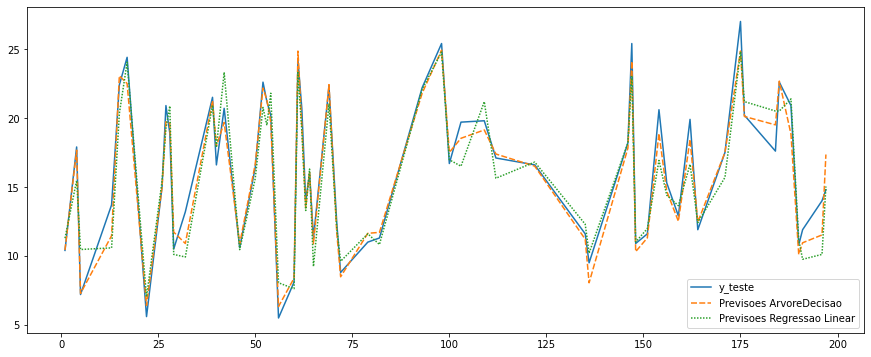

In [8]:
#Visualizar graficamente as previsões:

#criar uma tabela vazia
df_aux = pd.DataFrame()

#inserir 3 colunas: teste, previsao_arvore, previsao_regressao:
df_aux['y_teste'] = y_test
df_aux['Previsoes ArvoreDecisao'] = previsao_arvoredecisao
df_aux['Previsoes Regressao Linear'] = previsao_regressaolinear

plt.figure(figsize=(15,6)) #figsize: tamanho do gráfico
sns.lineplot(data=df_aux)
plt.show()

In [9]:
#com base em dados coletados, colocaremos o modelo para fazer uma previsao:
#importar tabela com os dados:
dados_reais = pd.read_csv('novos.csv')
display(dados_reais)

#usar o modelo de Arvore de Decisao para fazer uma previsao com base nos dados que temos
#fazer um .predict
previsao_RF = modelo_arvoredecisao.predict(dados_reais)
print(f'a previsao faturamento para cada um dos 3 casos será: {previsao_RF}')

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


a previsao faturamento para cada um dos 3 casos será: [ 7.778  8.234 20.252]


In [10]:
#mostrar a tabela
display(dados_reais)
#usar o modelo de Regressao Linear para fazer uma previsao com base nos dados que temos
#fazer um .predict
previsao_RL = modelo_arvoredecisao.predict(dados_reais)
print(f'a previsao faturamento para cada um dos 3 casos será: {previsao_RL}')

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


a previsao faturamento para cada um dos 3 casos será: [ 7.778  8.234 20.252]


<function matplotlib.pyplot.show(close=None, block=None)>

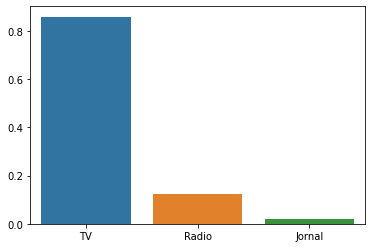

In [11]:
#Para avaliarmos a importancia de cada variavel para as vendas:
#x_train.columns = ['TV', 'Radio', 'Jornal']
sns.barplot(x=x_train.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show